In [2]:
#Objective:1
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
df=pd.read_csv(r"C:\Users\aamir\OneDrive\Desktop\CSV Files\housing.csv")

# Function to take user input for longitude and latitude
def get_user_coordinates():
    longitude = float(input("Enter longitude: "))
    latitude = float(input("Enter latitude: "))
    return longitude, latitude

# Function to calculate distance between two points
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)*2 + (y2 - y1)*2)

# Function to find the closest cluster to the user's input coordinates
def find_closest_cluster(user_longitude, user_latitude, centroids):
    min_distance = float('inf')
    closest_cluster = None
    for i, centroid in enumerate(centroids):
        distance = calculate_distance(user_longitude, user_latitude, centroid[0], centroid[1])
        if distance < min_distance:
            min_distance = distance
            closest_cluster = i
    return closest_cluster

# Take user input for number of clusters (k)
k = int(input("Enter the number of clusters (k): "))

# Extracting longitude and latitude columns
X = df[['longitude', 'latitude']]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Get centroids
centroids = kmeans.cluster_centers_

# Take user input for longitude and latitude
user_longitude, user_latitude = get_user_coordinates()

# Find the closest cluster to the user's input coordinates
closest_cluster = find_closest_cluster(user_longitude, user_latitude, centroids)

# Get data points in the closest cluster
closest_cluster_df = df[kmeans.labels_ == closest_cluster]

# Train a linear regression model to predict median_house_value
X_cluster = closest_cluster_df[['longitude', 'latitude']]
y_cluster = closest_cluster_df['median_house_value']

regression_model = LinearRegression()
regression_model.fit(X_cluster, y_cluster)

# Predicting median_house_value for the specific longitude and latitude
predicted_median_house_value = regression_model.predict([[user_longitude, user_latitude]])
print("Predicted median house value:", predicted_median_house_value[0])

Enter the number of clusters (k): 2


C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Enter longitude: -122.5
Enter latitude: 35.6
Predicted median house value: 417321.3807805674


C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


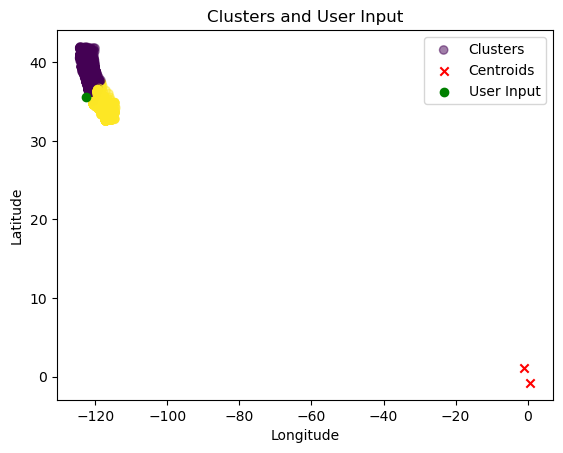

In [3]:
import matplotlib.pyplot as plt

# Scatter plot of data points
plt.scatter(df['longitude'], df['latitude'], c=kmeans.labels_, cmap='viridis', alpha=0.5, label='Clusters')
# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', label='Centroids')
# Plot user input
plt.scatter(user_longitude, user_latitude, marker='o', color='green', label='User Input')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters and User Input')
plt.legend()
plt.show()
#Outliers: Possibility is that there are outliers in the dataset.If there are outliers in a cluster, the centroid may be pulled towards them, causing it to be located outside the main cluster.
#Dimensionality: In higher-dimensional spaces, the concept of a centroid becomes less intuitive, and the centroid may appear to be outside the cluster even if it is technically within the cluster in some dimensions.

In [4]:
#obj1:- Silhouette Score
from sklearn.metrics import silhouette_score
# Performing k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Obtaining cluster labels
cluster_labels = kmeans.labels_

# Computing Silhouette Score
silhouette_score_value = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette_score_value)
#A higher score indicates better clustering.

C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.7549172189258013
